In [ ]:
#The goal is to compare the performance of three(3) Recurrent Neural Networks (RNN) algorithm and combination of the three to predict the prices of cryptocurrencies, Bitcoin (BTC), Litecoin (LTC), and Ethereum (ETH).

# The goal is to compare the performance of three(3) Recurrent Neural Networks (RNN) algorithm and combination of the three to predict the prices of cryptocurrencies, Bitcoin (BTC), Litecoin (LTC), and Ethereum (ETH).

In [ ]:
"""
Author
Tokunbo Ojo    -  tooj21@student.bth.se
"""

'\nAuthor\nTokunbo Ojo    -  tooj21@student.bth.se\n'

# Author
Tokunbo Ojo    -  tooj21@student.bth.se

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
#from binance.client import Client
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import math # Mathematical functions
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [5]:
#Chart layout

layout = go.Layout(
    autosize=False,
    width=1100,
    height=500,

    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    margin=go.layout.Margin(
        l=20,
        r=20,
        b=50,
        t=50,
        pad = 4
    )
)

### This section collect historical data from binance and save it as csv.

In [6]:
#Get data from Binance Exchange
# Binance API Key
# api_key = ''
# api_secret = ''
# #Historical data interval -  Daily
# interval = '5m' # This can be adjusted to days, minutes, seconds or tick
# data_dir = "./dataset/"
# symbols = ['BTCUSDT', 'ETHUSDT', 'LTCUSDT']
#
# if len(api_secret) > 0 and len(api_key) > 0:
#     client = Client(api_key, api_secret)
#     for symbol in symbols:
#         #5 mins
#         klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_5MINUTE, "1 Jan, 2023", "7 Jan, 2023")
#         data = pd.DataFrame(klines)
#         data.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
#                     'taker_base_vol', 'taker_quote_vol', 'ignore']
#         data.to_csv(data_dir + symbol + "_5MIN" + '.csv', index=None, header=True)
#         #15 mins
#         klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_15MINUTE, "1 Jan, 2023", "14 Jan, 2023")
#         data = pd.DataFrame(klines)
#         data.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades',
#                     'taker_base_vol', 'taker_quote_vol', 'ignore']
#         data.to_csv(data_dir + symbol + "_15MIN" + '.csv', index=None, header=True)


# Explore the Data

In [9]:
#Load and clean data for BTCUSDT for 5 mins pair
df = pd.read_csv('/content/drive/MyDrive/dataset/BTCUSDT_5MIN.csv')
# conver the timestamp to date
df.index = [(dt.datetime.fromtimestamp(x / 1000.0)) for x in df.close_time]
df

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-01-01 00:04:59.999,1672531200000,16541.77,16544.76,16527.51,16535.38,486.60903,1672531499999,8.046638e+06,14258,220.13975,3.640278e+06,0
2023-01-01 00:09:59.999,1672531500000,16534.91,16540.43,16522.55,16526.67,391.19043,1672531799999,6.467462e+06,11944,189.61441,3.134879e+06,0
2023-01-01 00:14:59.999,1672531800000,16526.67,16530.87,16520.00,16520.69,294.73889,1672532099999,4.870446e+06,11282,143.59637,2.372892e+06,0
2023-01-01 00:19:59.999,1672532100000,16521.26,16537.73,16517.72,16534.94,481.18777,1672532399999,7.951478e+06,14060,260.25307,4.300614e+06,0
2023-01-01 00:24:59.999,1672532400000,16534.94,16540.66,16532.33,16535.54,309.53189,1672532699999,5.118777e+06,10050,162.28132,2.683691e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-06 23:44:59.999,1673048400000,16953.55,16955.60,16942.42,16943.20,328.21152,1673048699999,5.563372e+06,12146,142.65706,2.418216e+06,0
2023-01-06 23:49:59.999,1673048700000,16943.20,16963.19,16942.10,16961.14,535.00339,1673048999999,9.071490e+06,16248,283.74907,4.811229e+06,0
2023-01-06 23:54:59.999,1673049000000,16961.14,16966.82,16950.60,16952.01,501.08696,1673049299999,8.497772e+06,15136,239.19018,4.056432e+06,0
2023-01-06 23:59:59.999,1673049300000,16951.79,16955.60,16950.02,16950.65,271.41694,1673049599999,4.601171e+06,9429,141.39898,2.397098e+06,0


In [10]:
trace_close = go.Scatter(x=df.index, y=df['close'], mode='lines', name='close price')
data = [trace_close]
fig = go.Figure(data=data, layout=layout)
# Plot it and save as basic-line.html
pyo.iplot(fig, filename = 'chart')

# # Selecting Features

In [11]:
# Indexing Batches
train_df = df.copy()

# List of considered Features
FEATURES = ['open', 'high', 'low', 'close', 'volume', 'num_trades']

print('FEATURE LIST')
print([f for f in FEATURES])

# Create the dataset with features and filter the data to the list of FEATURES
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['close']

data_filtered_ext

FEATURE LIST
['open', 'high', 'low', 'close', 'volume', 'num_trades']


,open,high,low,close,volume,num_trades,Prediction
2023-01-01 00:04:59.999,16541.77,16544.76,16527.51,16535.38,486.60903,14258,16535.38
2023-01-01 00:09:59.999,16534.91,16540.43,16522.55,16526.67,391.19043,11944,16526.67
2023-01-01 00:14:59.999,16526.67,16530.87,16520.00,16520.69,294.73889,11282,16520.69
2023-01-01 00:19:59.999,16521.26,16537.73,16517.72,16534.94,481.18777,14060,16534.94
2023-01-01 00:24:59.999,16534.94,16540.66,16532.33,16535.54,309.53189,10050,16535.54
...,...,...,...,...,...,...,...
2023-01-06 23:44:59.999,16953.55,16955.60,16942.42,16943.20,328.21152,12146,16943.20
2023-01-06 23:49:59.999,16943.20,16963.19,16942.10,16961.14,535.00339,16248,16961.14
2023-01-06 23:54:59.999,16961.14,16966.82,16950.60,16952.01,501.08696,15136,16952.01
2023-01-06 23:59:59.999,16951.79,16955.60,16950.02,16950.65,271.41694,9429,16950.65


In [ ]:
# Scaling the Data

# Scaling the Data

In [12]:
# Get the number of rows in the data
nrows = data_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
#scaler = MinMaxScaler()
df_Close = pd.DataFrame(data_filtered_ext['close'])
np_Close_scaled = scaler.fit_transform(df_Close)

(1729, 6)


Transforming the  Data. We will apply the sliding window approach to our data

In [13]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 50

# Prediction Index
index_Close = data.columns.get_loc("close")

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

# Create the training and test data
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_Close]) #contains the prediction values for validation,  for single-step prediction

    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_train[1][sequence_length-1][index_Close])
print(y_train[0])

(1334, 50, 6) (1334,)
(345, 50, 6) (345,)
0.024168157749169725
0.024168157749169725


# Train the LSTM Prediction Model

In [14]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(6))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

300 50 6


In [15]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )


Epoch 1/50
84/84 [==============================] - 11s 27ms/step - loss: 0.0072 - val_loss: 0.0065
Epoch 2/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0039 - val_loss: 0.0063
Epoch 3/50
84/84 [==============================] - 1s 13ms/step - loss: 0.0038 - val_loss: 0.0060
Epoch 4/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0037 - val_loss: 0.0068
Epoch 5/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 6/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 7/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 8/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 9/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 10/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 11

# Plot training & validation loss values

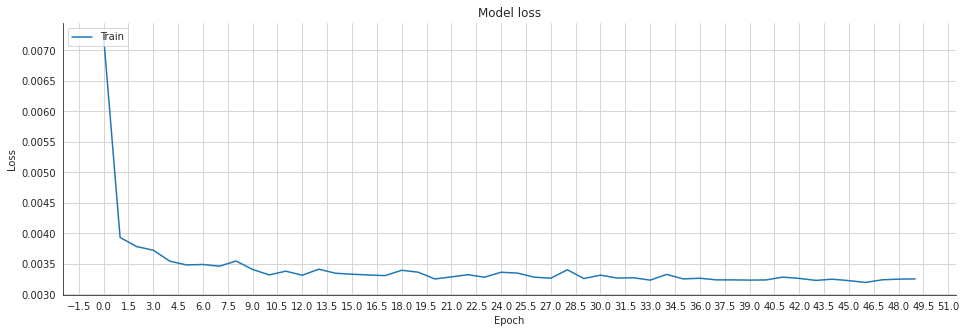

In [16]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

# Get the predicted values

In [17]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

11/11 [==============================] - 1s 6ms/step
Median Absolute Error (MAE): 17.52
Mean Absolute Percentage Error (MAPE): 0.11 %
Median Absolute Percentage Error (MDAPE): 0.06 %


In [18]:
visualise_pred = data_filtered.iloc[train_data_len:, 3:4]
visualise_pred['prediction'] = y_pred
visualise_pred['test'] = y_test_unscaled
visualise_pred

,close,prediction,test
2023-01-05 19:24:59.999,16844.56,16542.390625,16564.167883
2023-01-05 19:29:59.999,16834.72,16556.656250,16559.667330
2023-01-05 19:34:59.999,16835.15,16549.980469,16556.969848
2023-01-05 19:39:59.999,16849.38,16552.458984,16564.732127
2023-01-05 19:44:59.999,16846.32,16557.876953,16542.071558
...,...,...,...
2023-01-06 23:44:59.999,16943.20,16548.511719,16530.114489
2023-01-06 23:49:59.999,16961.14,16539.273438,16549.662168
2023-01-06 23:54:59.999,16952.01,16550.117188,16546.456106
2023-01-06 23:59:59.999,16950.65,16546.921875,16524.745795


Quick view of the actual price and predicted price

In [19]:
trace_test = go.Scatter(x=visualise_pred.index, y=visualise_pred['test'], mode='lines', name='Test')
trace_pred = go.Scatter(x=visualise_pred.index, y=visualise_pred['prediction'], mode='lines', name='Prediction')
data = [trace_test, trace_pred]
fig = go.Figure(data=data, layout=layout)
# Plot it and save as basic-line.html
pyo.iplot(fig, filename = 'chart')

In [20]:
lstm_mean_abs_error_list = []
for i in range(10):

  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )
  
  y_pred_scaled = model.predict(x_test)

  y_pred = scaler.inverse_transform(y_pred_scaled)
  y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

  MAE = mean_absolute_error(y_test_unscaled, y_pred)
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}') 
  lstm_mean_abs_error_list.append(np.round(MAE, 2))


Epoch 1/50
84/84 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0058
Epoch 2/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 3/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 4/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0057
Epoch 5/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 6/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 7/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 8/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 9/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 10/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 11/

KeyboardInterrupt: ignored

In [ ]:
#Training GRU Prediction Model

In [40]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(GRU(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(GRU(n_neurons, return_sequences=False))
model.add(Dense(6))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

300 50 6


In [41]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

Epoch 1/50
84/84 [==============================] - 6s 18ms/step - loss: 0.0108 - val_loss: 0.0060
Epoch 2/50
84/84 [==============================] - 1s 11ms/step - loss: 0.0036 - val_loss: 0.0059
Epoch 3/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 4/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 5/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 6/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0033 - val_loss: 0.0065
Epoch 7/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 8/50
84/84 [==============================] - 1s 12ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 9/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 10/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 11/

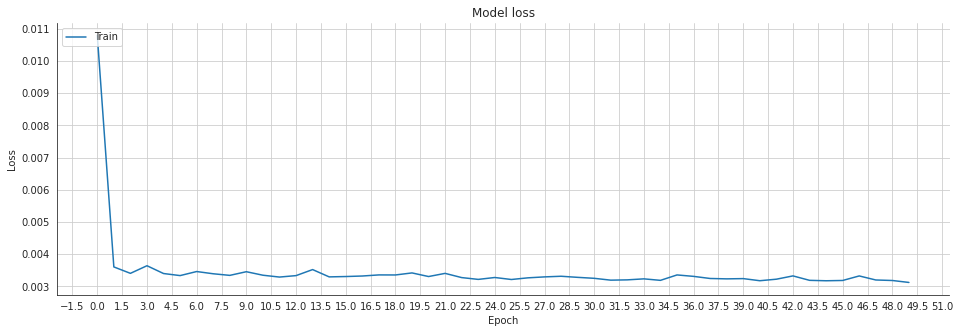

In [42]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [45]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred_gru = scaler.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_gru)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_gru)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_gru)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

11/11 [==============================] - 0s 6ms/step
Median Absolute Error (MAE): 19.06
Mean Absolute Percentage Error (MAPE): 0.11 %
Median Absolute Percentage Error (MDAPE): 0.07 %


In [46]:
#visualise_pred = data_filtered.iloc[train_data_len:, 3:4]
visualise_pred['prediction_gru'] = y_pred_gru
#visualise_pred['test'] = y_test_unscaled
visualise_pred

,close,prediction,test,prediction_gru
2023-01-05 19:24:59.999,16844.56,16539.986328,16564.167883,16539.171875
2023-01-05 19:29:59.999,16834.72,16558.152344,16559.667330,16564.248047
2023-01-05 19:34:59.999,16835.15,16549.673828,16556.969848,16554.845703
2023-01-05 19:39:59.999,16849.38,16553.357422,16564.732127,16561.623047
2023-01-05 19:44:59.999,16846.32,16559.439453,16542.071558,16567.496094
...,...,...,...,...
2023-01-06 23:44:59.999,16943.20,16550.503906,16530.114489,16563.769531
2023-01-06 23:49:59.999,16961.14,16538.177734,16549.662168,16547.347656
2023-01-06 23:54:59.999,16952.01,16552.144531,16546.456106,16557.728516
2023-01-06 23:59:59.999,16950.65,16546.058594,16524.745795,16547.185547


In [47]:
trace_test = go.Scatter(x=visualise_pred.index, y=visualise_pred['test'], mode='lines', name='Test')
trace_pred = go.Scatter(x=visualise_pred.index, y=visualise_pred['prediction_gru'], mode='lines', name='Prediction Gru')
data = [trace_test, trace_pred]
fig = go.Figure(data=data, layout=layout)
# Plot it and save as basic-line.html
pyo.iplot(fig, filename = 'chart')

In [ ]:
#Training Bidirectional LSTM Prediction Model

In [ ]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))))
model.add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
model.add(Dense(6))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )


In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred_bi_lstm = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_bi_lstm)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_bi_lstm)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_bi_lstm)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

In [ ]:
#visualise_pred = data_filtered.iloc[train_data_len:, 3:4]
visualise_pred['prediction_bi_lstm'] = y_pred
#visualise_pred['test'] = y_test_unscaled
visualise_pred

In [ ]:
trace_test = go.Scatter(x=visualise_pred.index, y=visualise_pred['test'], mode='lines', name='Test')
trace_pred = go.Scatter(x=visualise_pred.index, y=visualise_pred['prediction_bi_lstm'], mode='lines', name='Prediction Bi LSTM')
data = [trace_test, trace_pred]
fig = go.Figure(data=data, layout=layout)
# Plot it and save as basic-line.html
pyo.iplot(fig, filename = 'chart')

In [ ]:
y_pred_ensembled = (y_pred + y_pred_gru + y_pred_bi_lstm) / 3
y_pred_ensembled

In [ ]:

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred_ensembled)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred_ensembled)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred_ensembled)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')